In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./data/house_prices.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [12]:
missing_rows = df[df.isnull().any(axis=1)]
train_df = df.dropna()

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


🔹 Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB
None 

🔹 Первые строки:
         Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    

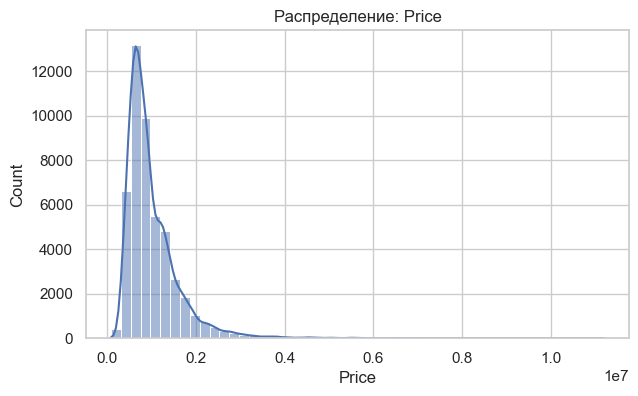

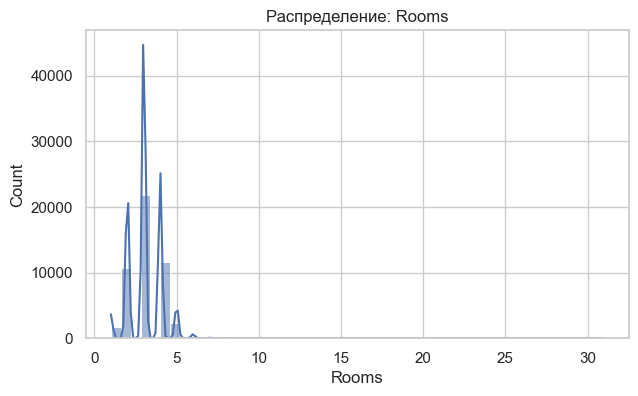

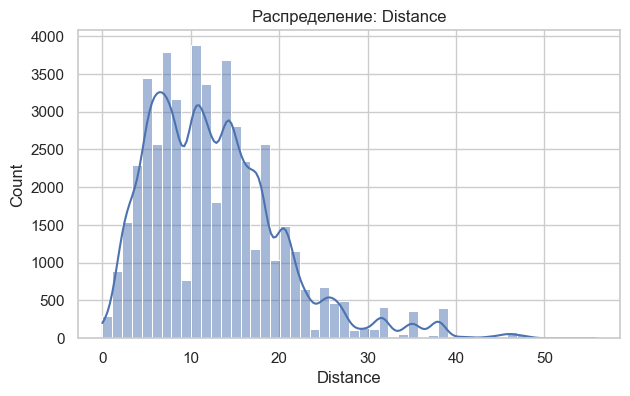

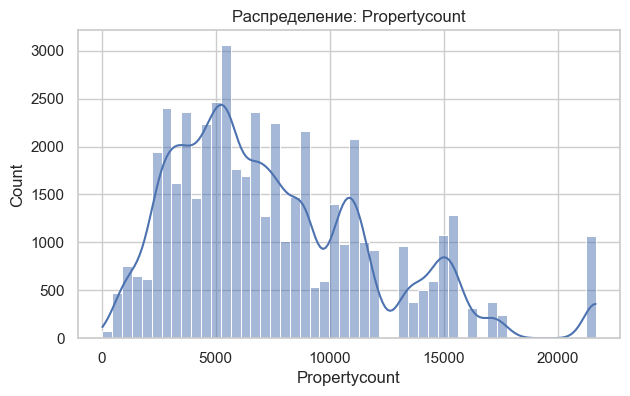

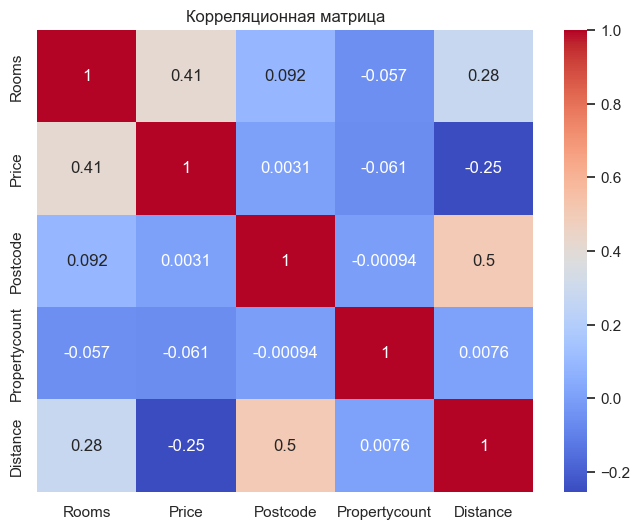

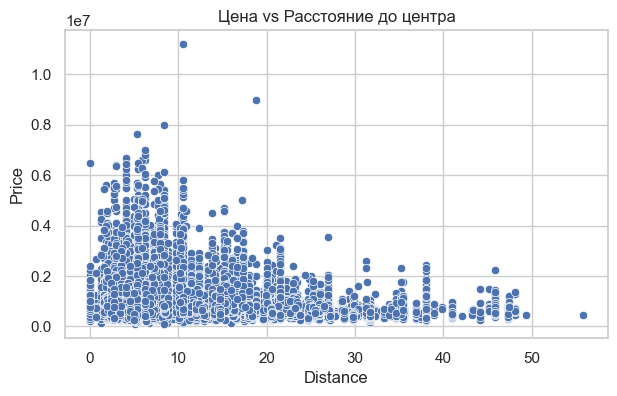

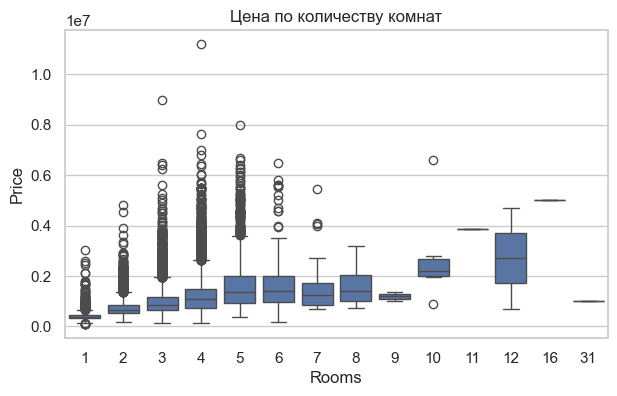


🔹 Средняя цена по типу:
Type
h    1.110587e+06
t    9.111480e+05
u    6.301053e+05
Name: Price, dtype: float64

🔹 Средняя цена по регионам (топ-10):
Regionname
Southern Metropolitan         1.373222e+06
Eastern Metropolitan          1.071837e+06
South-Eastern Metropolitan    8.462352e+05
Northern Metropolitan         8.237198e+05
Western Metropolitan          8.005163e+05
Eastern Victoria              6.893688e+05
Northern Victoria             6.430822e+05
Western Victoria              4.120261e+05
Name: Price, dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для читаемости
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 1️⃣ — Общая информация
print("🔹 Общая информация о данных:")
print(train_df.info(), "\n")

print("🔹 Первые строки:")
print(train_df.head(), "\n")

print("🔹 Основная статистика:")
print(train_df.describe().T, "\n")

# 2️⃣ — Проверка на пропуски
print("🔹 Пропуски в данных:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

# 3️⃣ — Анализ категориальных признаков
cat_cols = train_df.select_dtypes(include='object').columns
print("\n🔹 Категориальные признаки:", list(cat_cols))
for col in cat_cols:
    print(f"{col}: {train_df[col].nunique()} уникальных значений")

# 4️⃣ — Анализ распределений
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print("\n🔹 Числовые признаки:", list(num_cols))

for col in ['Price', 'Rooms', 'Distance', 'Propertycount']:
    plt.figure(figsize=(7, 4))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f'Распределение: {col}')
    plt.show()

# 5️⃣ — Корреляции
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# 6️⃣ — Зависимости между признаками
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Distance', y='Price', data=train_df)
plt.title('Цена vs Расстояние до центра')
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x='Rooms', y='Price', data=train_df)
plt.title('Цена по количеству комнат')
plt.show()

# 7️⃣ — Средние цены по типам и регионам
print("\n🔹 Средняя цена по типу:")
print(train_df.groupby('Type')['Price'].mean().sort_values(ascending=False))

print("\n🔹 Средняя цена по регионам (топ-10):")
print(train_df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).head(10))